In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Data Link: https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [2]:
data = pd.read_csv("ai4i2020.csv")

In [3]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [4]:
data['Machine failure'].unique()

array([0, 1])

In [5]:
data['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

## It is a class imbalance problem.

# EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [9]:
#check missing value
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [10]:
data['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

# How to handle categorical column?
- One Hot Encoding

# Data Preparation

In [11]:
def data_preparation(df):
  df = df.copy()

  #drop unnecessary columns
  df = df.drop(["UDI", "Product ID", "TWF", "HDF", "PWF", "OSF", "RNF"], axis=1)

  return df

In [12]:
X = data_preparation(data)

In [13]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


# Task
- To find "Machine Failure" if yes then 1 otherwise 0

# How we can do it?
- Traditional ML library "Scikit Learn"
- PyCaret (low code)

1. SK Learn 
- Pipeline
- Individual algorithm

# Using PyCaret

In [14]:
!pip install pycaret

     |████████████████████████████████| 266kB 4.1MB/s 
     |████████████████████████████████| 215kB 38.1MB/s 
     |████████████████████████████████| 2.0MB 38.5MB/s 
     |████████████████████████████████| 276kB 46.7MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
     |████████████████████████████████| 1.7MB 36.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 7.5MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 245kB 37.7MB/s 
     |████████████████████████████████| 6.8MB 25.3MB/s 
     |████████████████████████████████| 14.2MB 269kB/s 
     |████████████████████████████████| 1.2MB 16.4MB/s 
     |████████████████████████████████| 1.1MB 42.0MB/s 
     |████████████████████████████████| 3.2MB 42.4MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 

In [15]:
import pycaret.classification as pyc

In [16]:
dir(pyc)

['Any',
 'Dict',
 'Display',
 'List',
 'MLUsecase',
 'Optional',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_metric',
 'automl',
 'blend_models',
 'calibrate_model',
 'compare_models',
 'create_model',
 'deploy_model',
 'enable_colab',
 'ensemble_model',
 'evaluate_model',
 'finalize_model',
 'get_config',
 'get_logs',
 'get_metrics',
 'interpret_model',
 'io',
 'is_in_colab',
 'load_config',
 'load_model',
 'models',
 'np',
 'optimize_threshold',
 'pd',
 'plot_model',
 'predict_model',
 'pull',
 'pycaret',
 'remove_metric',
 'save_config',
 'save_model',
 'set_config',
 'setup',
 'stack_models',
 'traceback',
 'tune_model',
 'warnings']

- setup initialization, setup()
- compare_models()
- create_model()
- tune_model()
- predict_model
-save_model()

In [17]:
pyc.setup(
    data = X,
    target = "Machine failure",
    train_size = 0.8,
    normalize = True
)

,Description,Value
0,session_id,5957
1,Target,Machine failure
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10000, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


([<pandas.io.formats.style.Styler at 0x7effe5ce6850>],
 [('Setup Config',                                Description             Value
   0                               session_id              5957
   1                                   Target   Machine failure
   2                              Target Type            Binary
   3                            Label Encoded        0: 0, 1: 1
   4                            Original Data        (10000, 7)
   5                           Missing Values             False
   6                         Numeric Features                 5
   7                     Categorical Features                 1
   8                         Ordinal Features             False
   9                High Cardinality Features             False
   10                 High Cardinality Method              None
   11                   Transformed Train Set         (8000, 8)
   12                    Transformed Test Set         (2000, 8)
   13                      Shuffl

In [18]:
pyc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9852,0.9743,0.6541,0.8806,0.7473,0.7399,0.7503,0.189
gbc,Gradient Boosting Classifier,0.9841,0.9721,0.6207,0.8698,0.7207,0.7129,0.7255,0.693
rf,Random Forest Classifier,0.9820,0.9604,0.5130,0.9119,0.6522,0.6439,0.6743,0.862
dt,Decision Tree Classifier,0.9761,0.8209,0.6544,0.6482,0.6481,0.6358,0.6375,0.039
et,Extra Trees Classifier,0.9756,0.9494,0.2862,0.9673,0.4394,0.4308,0.5173,0.646
knn,K Neighbors Classifier,0.9735,0.8450,0.2860,0.8061,0.4196,0.4092,0.4689,0.136
ada,Ada Boost Classifier,0.9717,0.9523,0.4053,0.6210,0.4839,0.4703,0.4847,0.279
lr,Logistic Regression,0.9694,0.8941,0.1523,0.7100,0.2450,0.2365,0.3131,0.335
lda,Linear Discriminant Analysis,0.9685,0.8687,0.3231,0.5560,0.4055,0.3907,0.4074,0.032
svm,SVM - Linear Kernel,0.9680,0.0000,0.0781,0.7290,0.1346,0.1295,0.2172,0.035


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5957, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [19]:
best_model = pyc.create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9850,0.9806,0.6154,0.8889,0.7273,0.7198,0.7327
1,0.9862,0.9860,0.7037,0.8636,0.7755,0.7685,0.7728
2,0.9788,0.9526,0.5185,0.7778,0.6222,0.6117,0.6251
3,0.9912,0.9816,0.7778,0.9545,0.8571,0.8527,0.8574
4,0.9900,0.9744,0.7037,1.0000,0.8261,0.8211,0.8346
5,0.9850,0.9816,0.6296,0.8947,0.7391,0.7316,0.7436
6,0.9812,0.9883,0.7037,0.7308,0.7170,0.7073,0.7074
7,0.9875,0.9732,0.7037,0.9048,0.7917,0.7853,0.7919
8,0.9850,0.9775,0.6667,0.8571,0.7500,0.7424,0.7486
9,0.9825,0.9468,0.5185,0.9333,0.6667,0.6584,0.6886


In [20]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5957, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [21]:
pyc.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
tuned_lgbm_model = pyc.tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9812,0.9790,0.5769,0.7895,0.6667,0.6573,0.6658
1,0.9862,0.9863,0.6296,0.9444,0.7556,0.7488,0.7651
2,0.9812,0.9495,0.5185,0.8750,0.6512,0.6422,0.6655
3,0.9862,0.9653,0.6296,0.9444,0.7556,0.7488,0.7651
4,0.9888,0.9879,0.6667,1.0000,0.8000,0.7945,0.8118
5,0.9825,0.9673,0.5926,0.8421,0.6957,0.6869,0.6982
6,0.9888,0.9860,0.7407,0.9091,0.8163,0.8106,0.8151
7,0.9838,0.9690,0.6296,0.8500,0.7234,0.7152,0.7238
8,0.9825,0.9719,0.5556,0.8824,0.6818,0.6733,0.6924
9,0.9800,0.9486,0.4444,0.9231,0.6000,0.5910,0.6329


In [23]:
pyc.evaluate_model(tuned_lgbm_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [24]:
pyc.save_model(best_model, "machine_failure")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Machine failure',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
              

## Using Sklearn's Pipeline

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# no need to scale the data for tree-based model, only for linear models
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix, classification_report

In [26]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [27]:
def preprocess_inputs(df):
  df = df.copy()

  #drop unnecessary columns
  df = df.drop(["UDI", "Product ID", "TWF", "HDF", "PWF", "OSF", "RNF"], axis=1)

  #X(features) and y(target/class/labels)
  X = df.drop('Machine failure', axis=1)
  y = df['Machine failure']

  #split
  X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, shuffle=True, random_state=1)

  return X_train, X_test, y_train, y_test 

In [28]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [29]:
X_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
2694,M,300.1,309.6,1625,38.0,46
5140,M,304.3,313.6,1585,32.1,202
2568,L,299.6,309.2,1450,43.1,160
3671,M,302.3,311.7,1486,39.6,147
7427,L,300.0,311.4,1634,31.9,0
...,...,...,...,...,...,...
2895,M,300.7,309.6,1473,48.1,87
7813,L,300.0,311.5,1455,41.7,130
905,L,295.6,306.1,1474,41.2,156
5192,L,303.9,313.1,1310,62.9,130


In [30]:
y_train

2694    0
5140    0
2568    0
3671    0
7427    0
       ..
2895    0
7813    0
905     0
5192    0
235     0
Name: Machine failure, Length: 8000, dtype: int64

In [31]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

8000
2000
8000
2000


## Benefit of Sklearn pipeline
- you can pass multiple steps and transformers in one function

In [32]:
single_transformer = Pipeline(steps=[
                                     ("encode", OneHotEncoder(sparse=False))
])

col_transformer = ColumnTransformer(transformers=[
                                                  ("colencode", single_transformer, ['Type'])
], remainder = 'passthrough')

model = Pipeline(steps=[
                        ("coltransform", col_transformer),
                        ("scale", StandardScaler()),
                        ("classifier", LogisticRegression())
])

In [33]:
clf = model.fit(X_train, y_train)

In [34]:
print(clf)

Pipeline(memory=None,
         steps=[('coltransform',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('colencode',
                                                  Pipeline(memory=None,
                                                           steps=[('encode',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                                                                 sparse=False))],
                                   

# Evaluation

In [35]:
score = clf.score(X_test, y_test)
print("Model score is:", np.round(score*100), "%")

Model score is: 97.0 %


In [39]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


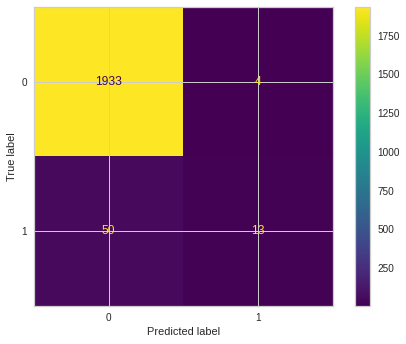

In [40]:
plot_confusion_matrix(clf, X_test, y_test, labels=clf.classes_)

In [42]:
clr = classification_report(y_test, y_pred, labels=clf.classes_)
print(clr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1937
           1       0.76      0.21      0.32        63

    accuracy                           0.97      2000
   macro avg       0.87      0.60      0.66      2000
weighted avg       0.97      0.97      0.97      2000



In [43]:
import pickle

In [44]:
# save the model to disk
filename = 'logreg_model.pkl'
pickle.dump(clf, open(filename, 'wb'))